# Computing
In this notebook, I am going to be discussing computing, and some of the computational problems yet to be resolved.


# Matrix Multiplication
Finding the most efficient algorithm for matrix multiplication is one of the longest standing problems in computing. Mathematicians have been trying to get to the goal of "exponent 2" (n^2) for decades, and as of right now, have gotten the growth rate down to  just below exponent 2.4. Illustrating that there is still some ways to go to reach that "optimal" algorithm, if it can be reached at all. Recently, Deep Reinforcment Learning (DRL) has been used to try and discover efficient algorithms for matrix multiplication.

# Big O Notation and Growth Rates
"Big-O Notation" is used to express the growth rate of algorithms, and how the complexity increases with increased input size. Common types of growth rate would be (where "n" is input size, and "k" is a positive integer): <br>
Exponential O(2^n)<br>
Polynomial O(n^k)<br>
Linear O(n)<br>
Constant O(1)<br>
Logarithmic O(log n)<br>

## Exercise 1
Describe and plot five examples of pairs of functions f and g such that f is O(g).

### Function 1
f = n^2 and g = n: For this pair of functions, we can see that f's complexity is growing polynomially , while g only grows linearly. As n increases, f will eventually rapidly get more and more complex than g, but early on, f is O(g).

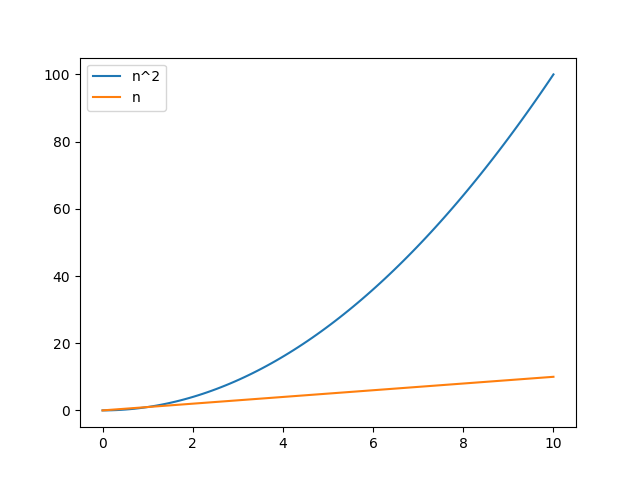

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the range of x values to plot
n = np.linspace(0, 10, 100)

# Plot the first pair of functions
f1 = n**2
g1 = n
plt.plot(n, f1, label='n^2')
plt.plot(n, g1, label='n')
plt.legend()
plt.show()

### Function 2
f = n^3 and g = n^2: In this case, both are growing polynomially, however while f's complexity is growing cubicly, g is growing quadratically. As n increases, f will eventually grow faster than g, at one point early on in the graph, f is O(g).

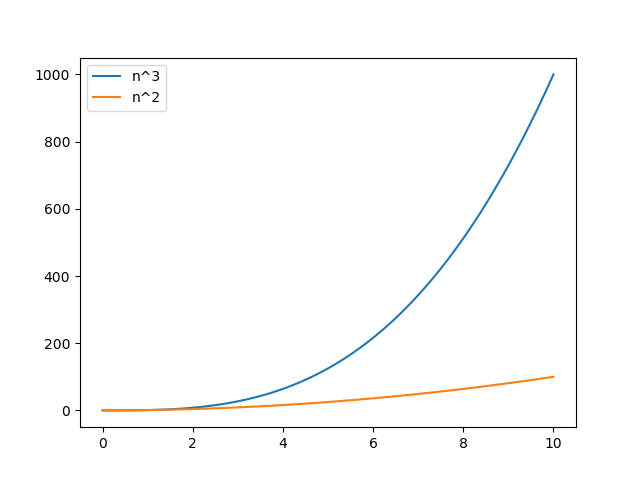

In [2]:
f2 = n**3
g2 = n**2
plt.plot(n, f2, label='n^3')
plt.plot(n, g2, label='n^2')
plt.legend()
plt.show()


### Function 3
f= n^2 and g = 2^n: In this case, f is growing polynomially, while g grows at an exponential rate. At one point in the graph, f is O(g), but g massively outgrows f by the time n is equal to 8.

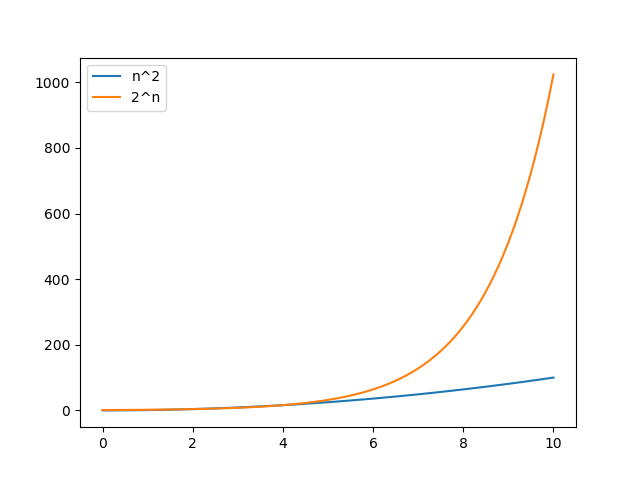

In [3]:
f3 = n**2
g3 = 2**n
plt.plot(n, f3, label= 'n^2')
plt.plot(n, g3, label='2^n')
plt.legend()
plt.show()

### Function 4
In this function, f is growing linearly, while g is constant. At the point where n == 1, f = O(g)

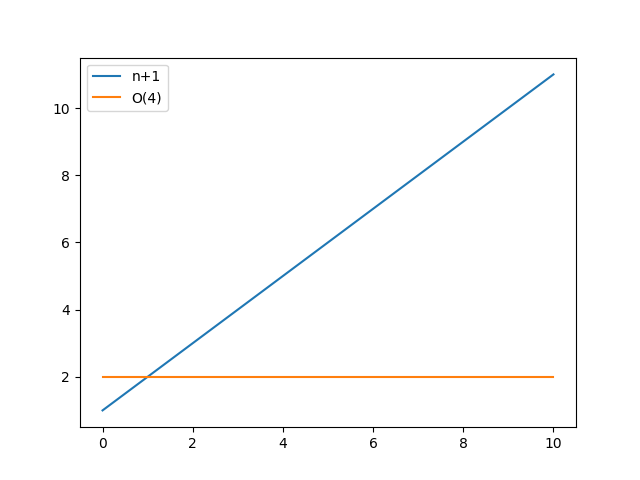

In [24]:
f4 = n+1
g4 = n-n+2
plt.plot(n, f4, label= 'n+1')
plt.plot(n, g4, label='O(4)')
plt.legend()
plt.show()

### Function 5
In this example, f is growing logarithmically, while g is growing polynomially. Despite f = O(g) early on, g quickly grows much faster

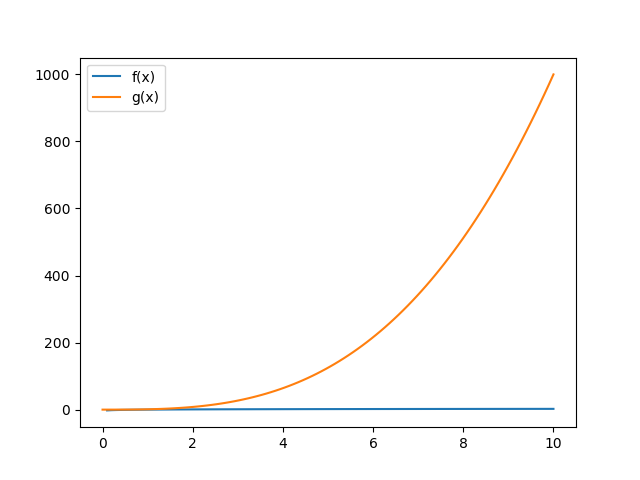

In [28]:
f5 = np.log(n)
g5 = n**3
x = np.linspace(1, 10, 100)

plt.plot(n, f5, label='f(x)')
plt.plot(n, g5, label='g(x)')
plt.legend()
plt.show()

# Turing Machine
A Turing Machine is a theoretical model for computation introduced by Alan Turing, one of the earliest computational models ever proposed. A Turing Machine consists of the following traits:<br>
* It has an infinitely long tape, that is divided into cells, that the machine can read symbols from, and write symbols to.
* A read/write head, that it uses while moving left and right through the tape.
* A set of "states", that determines what the machine will do.
* The ability to transition between states <br>
It works by reading a symbol from the tape, determining its next action based on its current state and the symbol, and then moves the tape and changes states. This process continues until the machine reaches an accept or reject state. If it is an accepted input, it will reach the accept state, if not, it is rejected.


## Example of Turing Machine in Python

In [5]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


## Exercise 2
Change the above code to only accept inputs that do not contain any 1's.

In [6]:
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'F'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'F'],
}
##changing the table so that the machine enters "F" state whenever it receives a "1" input. The remaining code can remain the same
